In [1]:
import numpy as np
import scanpy as sc

In [2]:
import squidpy as sq

In [3]:
import pandas as pd
import plotly.express as px

### All sections

In [23]:
adata=sc.read_h5ad('/lustre/scratch126/cellgen/team283/tl7/project/NJ_EMB/data/231129_moscot/Cytassist_Whole_Embryo_SOB26_CS17_55sections_SagittalSection_Moscot_Trial1.h5ad')

In [7]:
def select_slide(adata, s, s_col='sample'):
    r""" This function selects the data for one slide from the spatial anndata object.
    :param adata: Anndata object with multiple spatial experiments
    :param s: name of selected experiment
    :param s_col: column in adata.obs listing experiment name for each location
    """
    slide = adata[adata.obs[s_col].isin(s), :]
    s_keys = list(slide.uns['spatial'].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]
    slide.uns['spatial'] = {s_spatial: slide.uns['spatial'][s_spatial]}
    return slide


def select_slides(adata, s, s_col='sample'):
    """
    This function selects the data for specified slides from the spatial anndata object.
    
    :param adata: Anndata object with multiple spatial experiments
    :param s: list of names of selected experiments
    :param s_col: column in adata.obs listing experiment name for each location
    """
    # Filter the adata object for the specified slides
    slide = adata[adata.obs[s_col].isin(s), :]

    # Process the 'spatial' dictionary in 'uns'
    s_keys = list(slide.uns['spatial'].keys())
    filtered_spatial_keys = [k for k in s_keys if any(substring in k for substring in s)]
    
    if filtered_spatial_keys:
        # Update the 'spatial' dictionary to keep only the relevant keys
        slide.uns['spatial'] = {key: slide.uns['spatial'][key] for key in filtered_spatial_keys}
    else:
        # Handle the case where no matching keys are found
        print("Warning: No matching spatial keys found for the specified slides.")
        slide.uns['spatial'] = {}

    return slide

In [25]:
len(list(adata.uns['spatial']))

55

In [26]:
gene_of_interest=['TNNT2']

df=pd.DataFrame(adata.obsm['spatial_affine'])
df.columns=['X', 'Y']
df['sample']=pd.Categorical(adata.obs['sample'].values, categories=list(adata.uns['spatial']))
# df[gene_of_interest]=adata[:,adata.var['SYMBOL'].isin(gene_of_interest)].X.toarray()
df

,X,Y,sample
0,-16118.931322,1406.086145,section_022
1,25037.068678,7628.086145,section_022
2,-14526.931322,10148.086145,section_022
3,7410.068678,1647.086145,section_022
4,-17882.931322,656.086145,section_022
...,...,...,...
335420,1954.454351,1502.437669,section_281
335421,-56.785440,-2205.893425,section_281
335422,-2352.110189,219.228076,section_281
335423,2755.559835,-1488.412378,section_281


In [27]:
fig = px.scatter_3d(df, x='X', y='Y', z='sample', color='sample',width=1000, height=1000, opacity=1)
fig.update_traces(marker={'size': 2})
fig.show('iframe')

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
adata=sc.read_h5ad('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/all_sections_nocord_noliver_alpha_03_reference_022_212_161_165.h5ad')

In [10]:
len(list(adata.uns['spatial']))

55

In [11]:
adata.obsm['spatial_affine_022']

array([[-16118.93132195,   1406.0861453 ],
       [ 25037.06867805,   7628.0861453 ],
       [-14526.93132195,  10148.0861453 ],
       ...,
       [ -2235.14773978,    764.59000267],
       [  2329.78037673,  -2092.98944348],
       [ -2674.28003026,    816.77076025]])

# spatial_affine_022

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning:

The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:649: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a 

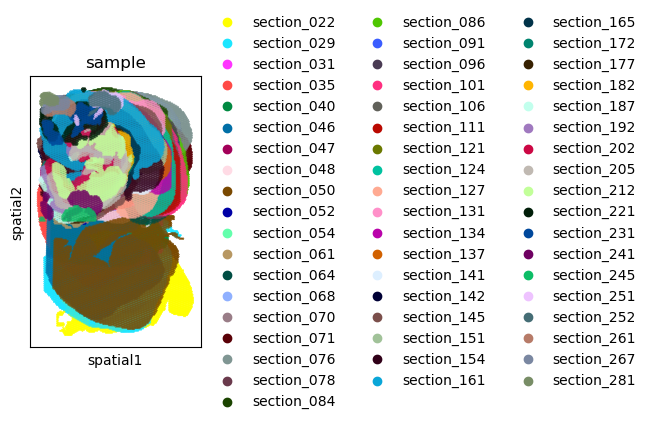

In [31]:
#adata.obsm['spatial_affine_161']=ap.align(reference="section_161", mode="affine")[0]
sq.pl.spatial_scatter(
    adata, 
    shape=None, 
    spatial_key="spatial", 
    library_id="sample", 
    color="sample"
)

In [32]:
#gene_of_interest=['TNNT2']
df3=pd.DataFrame(adata.obsm['spatial'])
df3.columns=['X', 'Y']
df3['sample']=pd.Categorical(adata.obs['sample'].values, categories=list(adata.uns['spatial']))
# df[gene_of_interest]=adata[:,adata.var['SYMBOL'].isin(gene_of_interest)].X.toarray()

In [33]:
fig = px.scatter_3d(df3, x='X', y='Y', z='sample', color='sample',width=1000, height=1000, opacity=1)
fig.update_traces(marker={'size': 2})
fig.show('iframe')

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [34]:
#gene_of_interest=['TNNT2']
df3=pd.DataFrame(adata.obsm['spatial_affine_022'])
df3.columns=['X', 'Y']
df3['sample']=pd.Categorical(adata.obs['sample'].values, categories=list(adata.uns['spatial']))
# df[gene_of_interest]=adata[:,adata.var['SYMBOL'].isin(gene_of_interest)].X.toarray()

In [35]:
fig = px.scatter_3d(df3, x='X', y='Y', z='sample', color='sample',width=1000, height=1000, opacity=1)
fig.update_traces(marker={'size': 2})
fig.show('iframe')

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
fig.write_html("/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/section_022_alpha_03.html")

# spatial_affine_161

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning:

The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:649: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a 

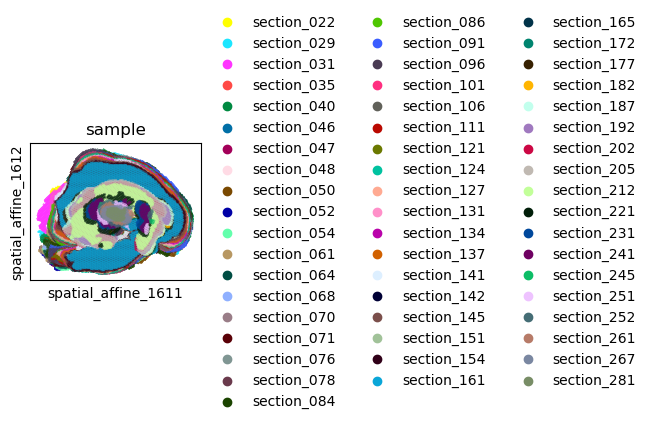

In [37]:
#adata.obsm['spatial_affine_161']=ap.align(reference="section_161", mode="affine")[0]
sq.pl.spatial_scatter(
    adata, 
    shape=None, 
    spatial_key="spatial_affine_161", 
    library_id="sample", 
    color="sample"
)

In [38]:
#gene_of_interest=['TNNT2']
df3=pd.DataFrame(adata.obsm['spatial_affine_161'])
df3.columns=['X', 'Y']
df3['sample']=pd.Categorical(adata.obs['sample'].values, categories=list(adata.uns['spatial']))
# df[gene_of_interest]=adata[:,adata.var['SYMBOL'].isin(gene_of_interest)].X.toarray()

In [39]:
fig = px.scatter_3d(df3, x='X', y='Y', z='sample', color='sample',width=1000, height=1000, opacity=1)
fig.update_traces(marker={'size': 2})
fig.show('iframe')

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [40]:
fig.write_html("/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/section_161_alpha_03.html")

# spatial_affine_165

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-pac

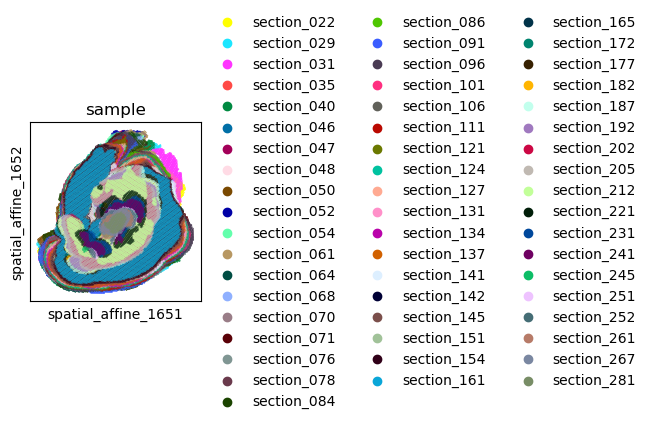

In [12]:
#adata.obsm['spatial_affine_161']=ap.align(reference="section_161", mode="affine")[0]
sq.pl.spatial_scatter(
    adata, 
    shape=None, 
    spatial_key="spatial_affine_165", 
    library_id="sample", 
    color="sample"
)

In [13]:
#gene_of_interest=['TNNT2']
df3=pd.DataFrame(adata.obsm['spatial_affine_165'])
df3.columns=['X', 'Y']
df3['sample']=pd.Categorical(adata.obs['sample'].values, categories=list(adata.uns['spatial']))
# df[gene_of_interest]=adata[:,adata.var['SYMBOL'].isin(gene_of_interest)].X.toarray()

In [14]:
fig = px.scatter_3d(df3, x='X', y='Y', z='sample', color='sample',width=1000, height=1000, opacity=1)
fig.update_traces(marker={'size': 2})
fig.show('iframe')

/nfs/team283/yd2/software/micromamba/envs/plotly/lib/python3.9/site-packages/plotly/express/_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [15]:
adata

AnnData object with n_obs × n_vars = 328343 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'WTSI_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'carnegie_stage', 'SOB'
    var: 'feature_types', 'genome', 'SYMBOL', 'mt', 'n_cells_by_counts-section_018', 'mean_counts-section_018', 'log1p_mean_counts-section_018', 'pct_dropout_by_counts-section_018', 'total_counts-section_018', 'log1p_total_counts-section_018', 'n_cells_by_counts-section_019', 'mean_counts-section_019', 'log1p_mean_counts-section_019', 'pct_dropout_by_counts-section_019', 'total_counts-section_019', 'log1p_total_counts-section_019', 'n_cells_by_counts-section_022', 'mean_counts-section_022', 'log1p_mean_counts-section_022', 'pct_dropout_by_counts-section_022', 'total_counts-section_022', 'log1p_total_counts-section_022', 'n_cell

In [19]:
adata.obsm['spatial_affine_022']

array([[-16118.93132195,   1406.0861453 ],
       [ 25037.06867805,   7628.0861453 ],
       [-14526.93132195,  10148.0861453 ],
       ...,
       [ -2235.14773978,    764.59000267],
       [  2329.78037673,  -2092.98944348],
       [ -2674.28003026,    816.77076025]])

In [ ]:
adata_transformation_matrix = adata.copy()

In [ ]:
adata_transformation_matrix=select_slides(adata_transformation_matrix, s=[
 'section_046',
 'section_061',
 'section_070',
 'section_084',
 'section_121',
 'section_161'])

In [ ]:
adata_transformation_matrix.var = adata_transformation_matrix.var[['feature_types', 'genome', 'SYMBOL']]

In [ ]:
del adata_transformation_matrix.obsm['spatial_affine_022']

In [ ]:
del adata_transformation_matrix.obsm['spatial_affine_161']

In [ ]:
del adata_transformation_matrix.obsm['spatial_affine_212']

In [ ]:
adata_transformation_matrix

In [44]:
fig.write_html("/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/section_165_alpha_03.html")